In [73]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [74]:
from google.colab import files
files.upload()

Saving smartwatches.csv to smartwatches (4).csv


{'smartwatches (4).csv': b',Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight\r\n0,noise,82990,89900,7.686318131,4,65,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,,,,,8,Yes,,35 - 50 g\r\n1,fire-boltt,3799,16999,77.65162657,4.3,20788,BSW046,,,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g\r\n2,boat,1999,7990,74.98122653,3.8,21724,Wave Call,,,Silicon,Yes,8,Yes,1.7 inches,35 - 50 g\r\n3,fire-boltt,1799,19999,91.00455023,4.3,13244,BSW053,,,Silicon,Yes,3.5,Yes,1.8 inches,75g +\r\n4,noise,1599,4999,68.01360272,4.1,13901,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,,,Other,Yes,8,Yes,1.7 inches,35 - 50 g\r\n5,noise,1499,3999,62.51562891,4,32704,NSW-05,,,Other,Yes,8,Yes,1.7 inches,35 - 50 g\r\n6,noise,1999,4999,60.0120024,4.1,1018,,,,,,,Yes,1.4 inches,35 - 50 g\r\n7,noise,1799,3999,55.01375344,4,32704,wrb-sw-colorfitgrand-std-rpnk_rpnk,,,Other,Yes,8,Yes,1.7 inches,35 - 50 g\

In [75]:
df = pd.read_csv("smartwatches.csv")
df

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,445,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Grey,Silicon,Yes,22.0,Yes,1.3 inches,NaN
446,446,fire-boltt,3700.0,9999.0,62.996300,NaN,NaN,beast pro,Square,Black,Silicon,Yes,8.0,Yes,0.1 inches,NaN
447,447,fire-boltt,5999.0,8999.0,33.337037,2.5,NaN,bsw003,Circle,Gold,Silicon,Yes,22.0,Yes,1.3 inches,NaN
448,448,fire-boltt,3200.0,7999.0,59.994999,NaN,NaN,call 2,Square,Blue,Silicon,Yes,22.0,Yes,0.1 inches,NaN


In [76]:
df.shape

(450, 16)

In [77]:
df.head()

,Unnamed: 0,Brand,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Model Name,Dial Shape,Strap Color,Strap Material,Touchscreen,Battery Life (Days),Bluetooth,Display Size,Weight
0,0,noise,82990.0,89900.0,7.686318,4.0,65.0,Wrb-sw-colorfitpro4alpha-std-rgld_pnk,NaN,NaN,NaN,NaN,8.0,Yes,NaN,35 - 50 g
1,1,fire-boltt,3799.0,16999.0,77.651627,4.3,20788.0,BSW046,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,50 - 75 g
2,2,boat,1999.0,7990.0,74.981227,3.8,21724.0,Wave Call,NaN,NaN,Silicon,Yes,8.0,Yes,1.7 inches,35 - 50 g
3,3,fire-boltt,1799.0,19999.0,91.004550,4.3,13244.0,BSW053,NaN,NaN,Silicon,Yes,3.5,Yes,1.8 inches,75g +
4,4,noise,1599.0,4999.0,68.013603,4.1,13901.0,Wrb-sw-colorfitpulsegobuzz-std-blk_blk,NaN,NaN,Other,Yes,8.0,Yes,1.7 inches,35 - 50 g


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 450 entries, 0 to 449
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           450 non-null    int64  
 1   Brand                450 non-null    object 
 2   Current Price        440 non-null    float64
 3   Original Price       377 non-null    float64
 4   Discount Percentage  377 non-null    float64
 5   Rating               444 non-null    float64
 6   Number OF Ratings    391 non-null    float64
 7   Model Name           415 non-null    object 
 8   Dial Shape           327 non-null    object 
 9   Strap Color          327 non-null    object 
 10  Strap Material       381 non-null    object 
 11  Touchscreen          413 non-null    object 
 12  Battery Life (Days)  418 non-null    float64
 13  Bluetooth            444 non-null    object 
 14  Display Size         420 non-null    object 
 15  Weight               264 non-null    obj

In [79]:
df.describe()

,Unnamed: 0,Current Price,Original Price,Discount Percentage,Rating,Number OF Ratings,Battery Life (Days)
count,450.000000,440.000000,377.000000,377.000000,444.000000,391.000000,418.000000
mean,224.500000,12747.554545,14598.204244,48.236894,4.031306,11594.726343,14.077392
std,130.048068,17760.666099,15450.028869,24.109830,0.550548,40423.889227,7.718503
min,0.000000,1199.000000,1669.000000,-79.688436,1.000000,1.000000,0.750000
25%,112.250000,2180.750000,5999.000000,33.337037,3.900000,68.500000,8.000000
50%,224.500000,3999.000000,7999.000000,54.550414,4.100000,996.000000,17.500000
75%,336.750000,17121.750000,17999.000000,66.677780,4.300000,6022.000000,22.000000
max,449.000000,139990.000000,96390.000000,91.004550,5.000000,619130.000000,22.000000


In [80]:
df.values

array([[0, 'noise', 82990.0, ..., 'Yes', nan, '35 - 50 g'],
       [1, 'fire-boltt', 3799.0, ..., 'Yes', '1.8 inches', '50 - 75 g'],
       [2, 'boat', 1999.0, ..., 'Yes', '1.7 inches', '35 - 50 g'],
       ...,
       [447, 'fire-boltt', 5999.0, ..., 'Yes', '1.3 inches', nan],
       [448, 'fire-boltt', 3200.0, ..., 'Yes', '0.1 inches', nan],
       [449, 'fire-boltt', 3000.0, ..., 'Yes', '0.1 inches', nan]],
      dtype=object)

In [81]:
df.isnull().sum()

,0
Unnamed: 0,0
Brand,0
Current Price,10
Original Price,73
Discount Percentage,73
Rating,6
Number OF Ratings,59
Model Name,35
Dial Shape,123
Strap Color,123


In [112]:
df['Original Price'].fillna(df['Original Price'].mean(),inplace=True)
df['Current Price'].fillna(df['Current Price'].mean(),inplace=True)
df['Discount Percentage'].fillna(df['Discount Percentage'].mean(),inplace=True)
df['Rating'].fillna(df['Rating'].mean(),inplace=True)
df['Number OF Ratings'].fillna(df['Number OF Ratings'].mean(),inplace=True)

<ipython-input-112-7471dfab249e>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Original Price'].fillna(df['Original Price'].mean(),inplace=True)
<ipython-input-112-7471dfab249e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [115]:
df.isnull().sum()

,0
Unnamed: 0,0
Brand,0
Current Price,0
Original Price,0
Discount Percentage,0
Rating,0
Number OF Ratings,0
Model Name,35
Dial Shape,123
Strap Color,123


In [82]:
!pip install ydata_profiling # install the missing module
import ydata_profiling as pp # import the installed module

In [83]:
pp.ProfileReport(df) #more elaorated EDA results

Output hidden; open in https://colab.research.google.com to view.

#Understanding Data with Visualization

In [84]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

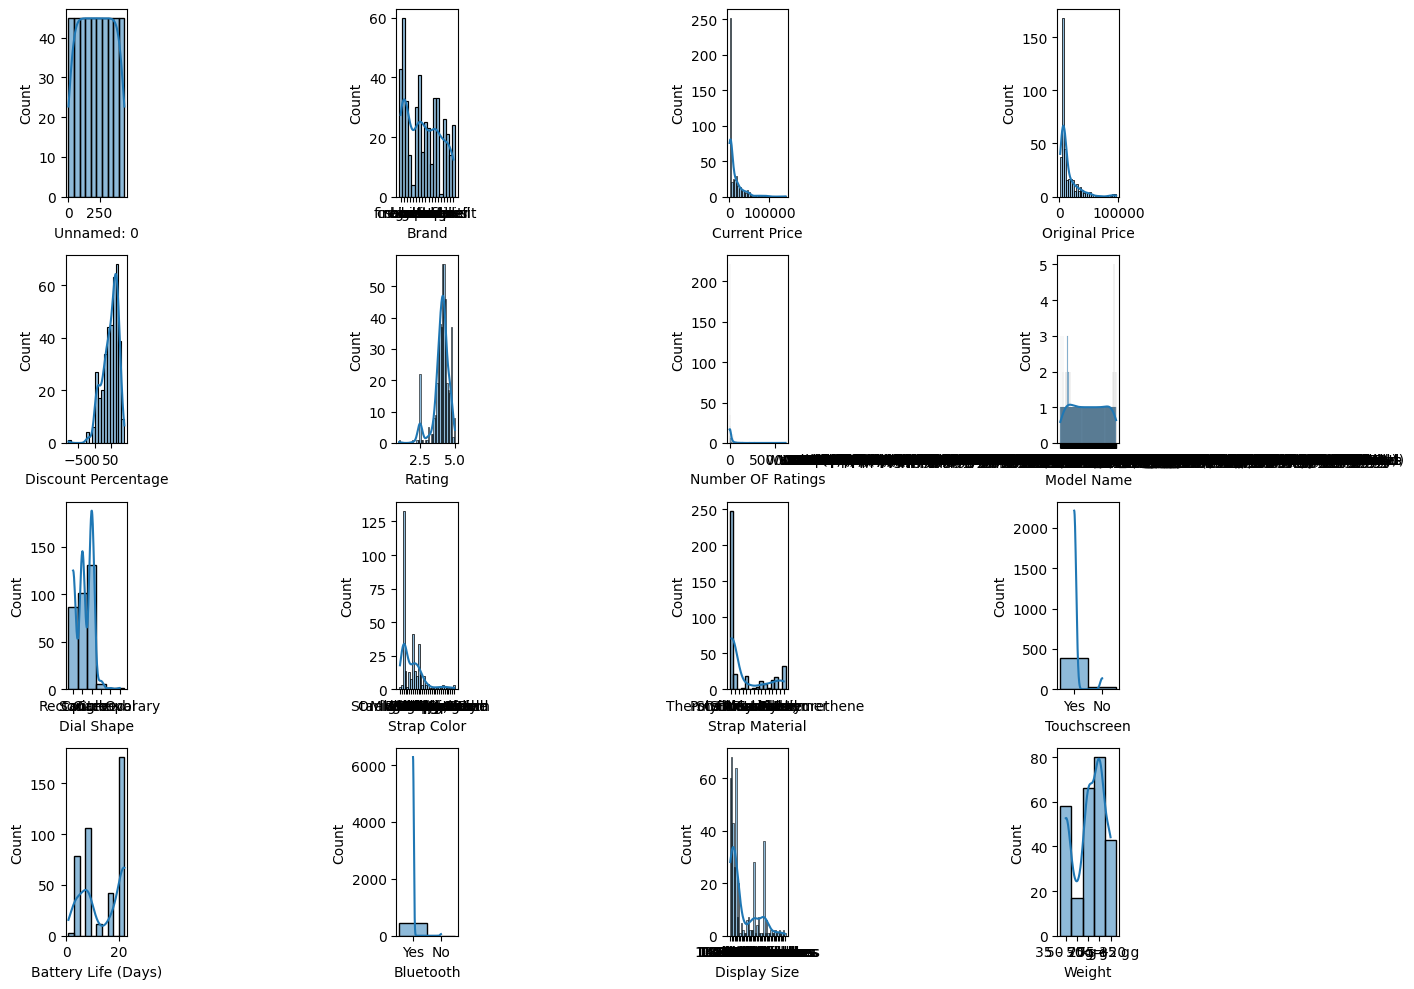

In [85]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(14, 10)) # Increased grid size to 4x4 to accommodate all columns

# Flatten the axes array to simplify indexing
axes = axes.flatten()

for i, colm in enumerate(df.columns): # Iterate through columns using df.columns
    if i < len(axes):  # Check if we still have subplots available
        sns.histplot(data=df[colm], ax=axes[i], kde=True)
        axes[i].set_xlabel(colm)
    else:
        break  # Stop plotting if we run out of subplots

plt.tight_layout()  # Adjust subplot parameters for a tight layout
plt.show()


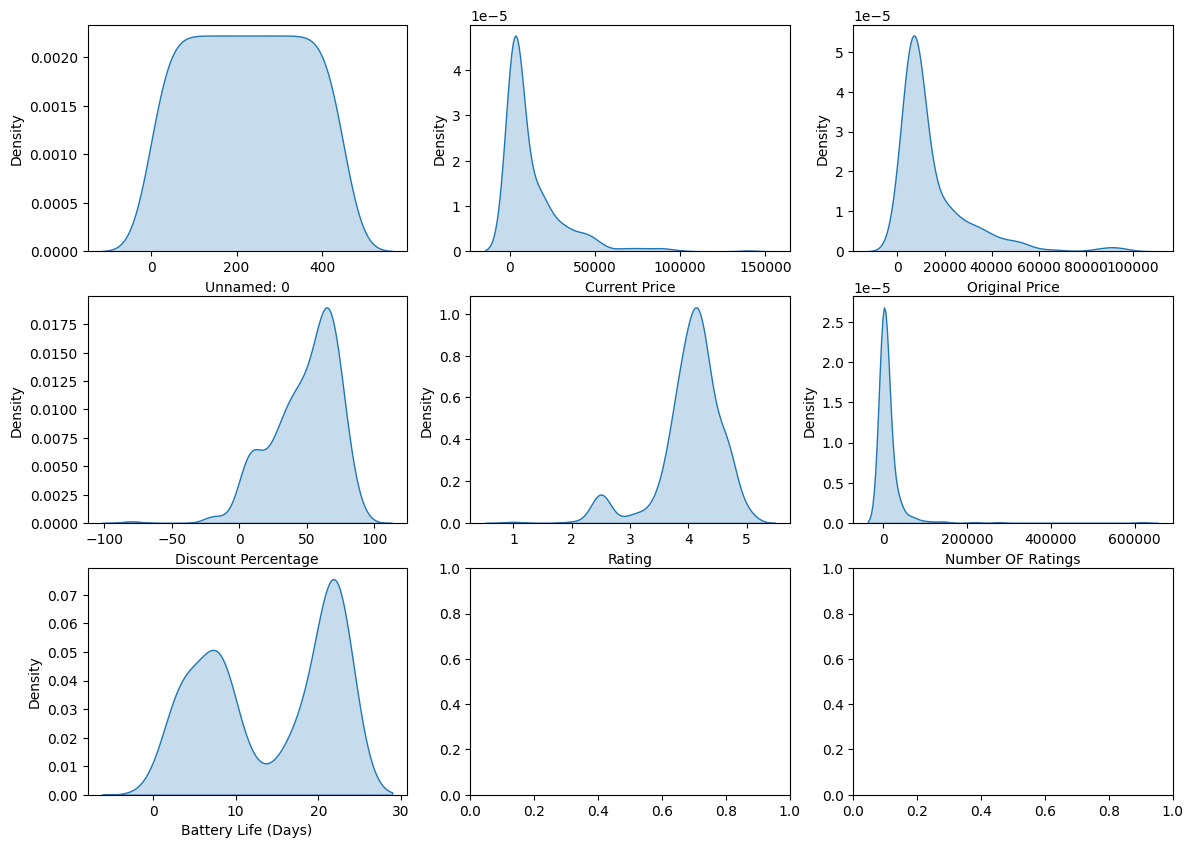

In [86]:
fig, axes = plt.subplots(nrows=3, ncols = 3, figsize =(14,10)) # figsize must be a tuple (width, height)

for i, colm in enumerate(df.select_dtypes(include=['number']).columns): # Iterate only through numerical columns
  row = i//3 # row index is floor division of i by number of columns
  col = i%3 # column index is remainder of i divided by number of columns
  sns.kdeplot(data=df[colm], ax=axes[row, col], fill = True) # axes is a 2D array, access the correct subplot using row and col index
  axes[row, col].set_xlabel(colm)

plt.show()

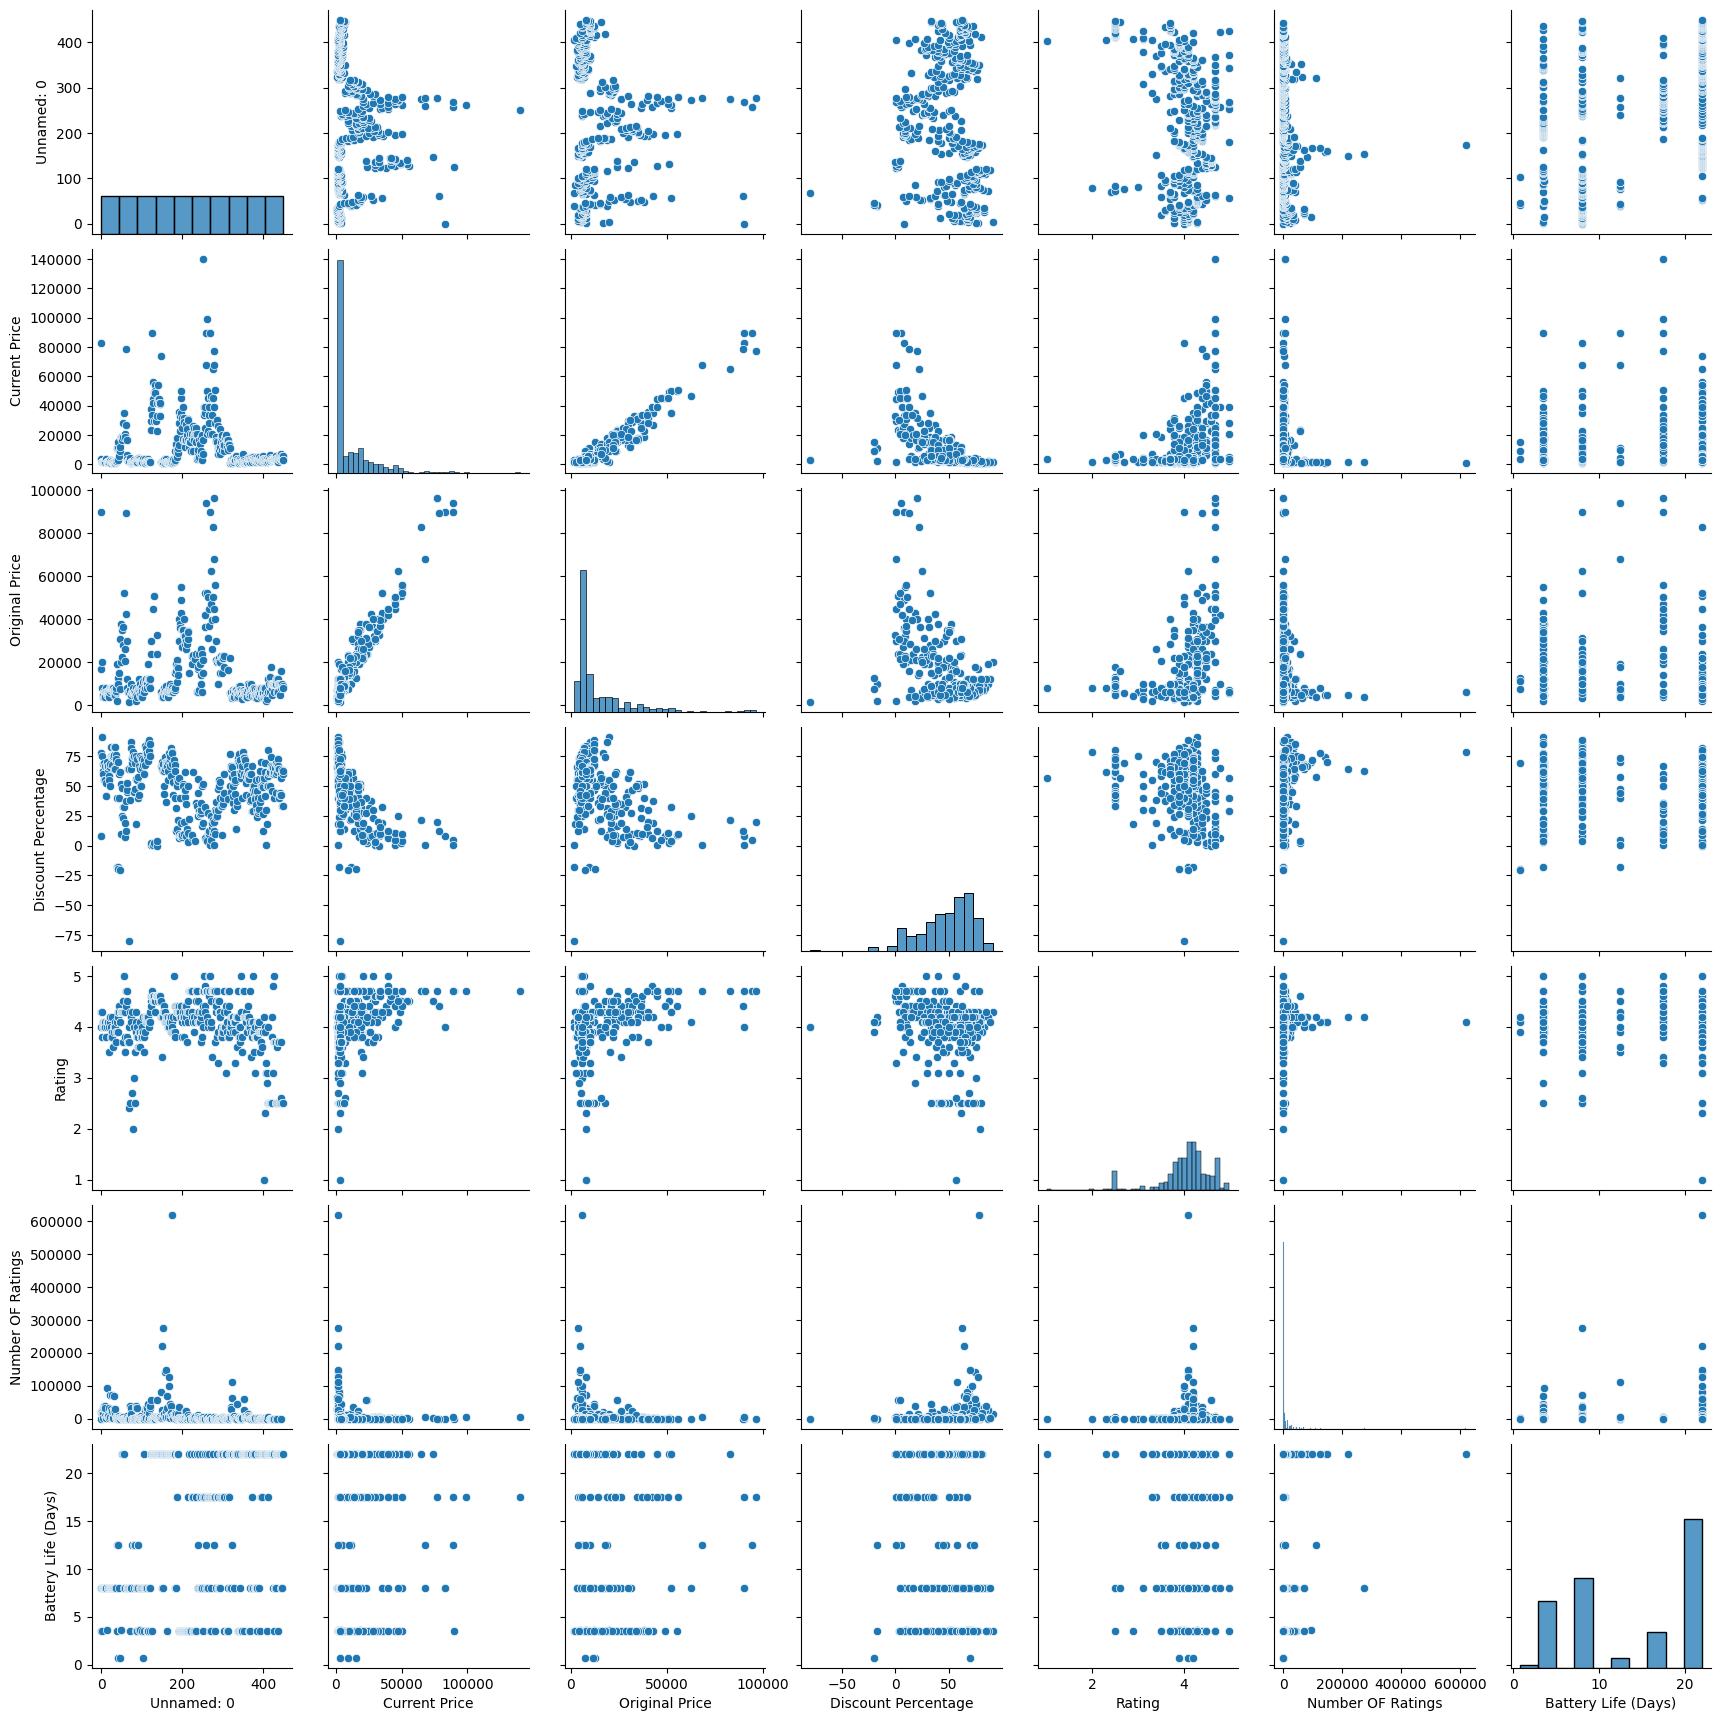

In [87]:
sns.pairplot(df)

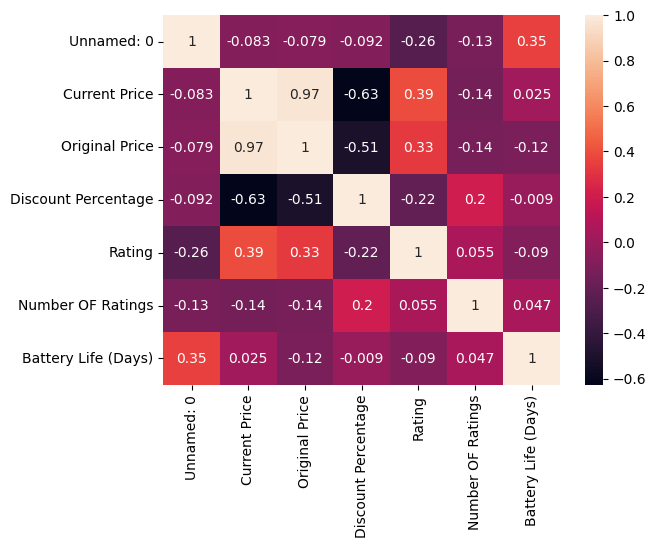

In [88]:
# Drop non-numeric columns before calculating correlation
numeric_df = df.select_dtypes(include=np.number)
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()

#Model Building

In [134]:
#Assuming 'df' is your DataFrame
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer # Import SimpleImputer

# Create a OneHotEncoder object
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore') # sparse=False for compatibility with train_test_split

# Identify categorical features (you may have already done this)
categorical_cols = [feature for feature in df.columns if df[feature].dtype == 'object']

# Fit the encoder to your categorical data
encoder.fit(df.loc[:,categorical_cols])

# Transform the categorical data into numerical data
encoded_data = encoder.transform(df.loc[:,categorical_cols])

# Create a DataFrame from the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Drop original categorical columns and add the encoded columns
df = df.drop(categorical_cols, axis=1)
df = pd.concat([df, encoded_df], axis=1)

# Now you can proceed with your train-test split and model fitting:
df['Discount_prize'] = (df['Current Price'] * (df['Discount Percentage'])) / 100
X = df.drop(['Discount_prize'], axis=1)
y = df["Discount_prize"]

# Impute NaN values before splitting # New lines to handle NaN
imputer = SimpleImputer(strategy='mean') # Or other strategies like 'median', 'most_frequent'
X = imputer.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train, y_train) # This should work without the ValueError now

LinearRegression()

In [135]:
y_pred = lr_model.predict(X_test)

In [ ]:
plt.plot(X, y_pred,color = 'red')
# Create a scatter plot of the data.
plt.scatter(X, y, c='b')
# Plot labels and title
plt.title('Salary vs Years of Experience')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.legend()

# Show plot
plt.show()

In [136]:
res = r2_score(y_test, y_pred)
res

-3.5164083987972834